# Seaborn

## import library and data

In [1]:
import seaborn as sns
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset('lukebarousse/data_jobs')
data = dataset['train'].to_pandas()

df = data.copy()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### 1

In [8]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [9]:
df_DA_US = df_DA_US.explode('job_skills')
DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False)
DA_top_pay = DA_top_pay.head(10)

In [10]:
DA_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
DA_top_skills = DA_top_skills.head(10).sort_values(by='median',ascending=False)

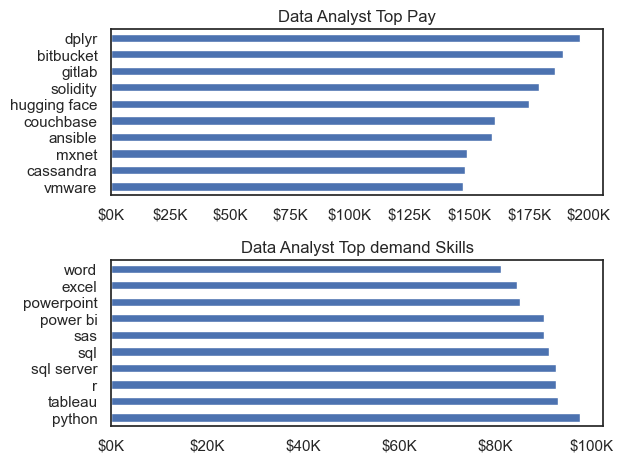

In [26]:
#visualization
fig,ax = plt.subplots(2,1)

# Top highest paid skills for data analysts
DA_top_pay[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].set_title('Data Analyst Top Pay')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

# top highest demand skills for Data analysts in USA
DA_top_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].set_title('Data Analyst Top demand Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

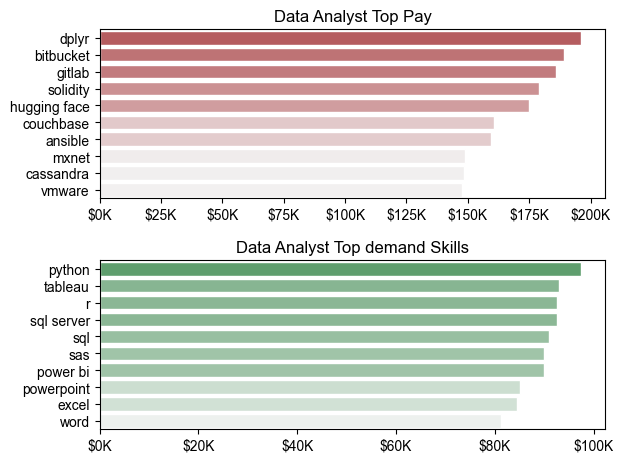

In [12]:
# visualization
fig, ax = plt.subplots(2, 1)
sns.set_theme(style='white')

# Top highest paid skills for data analysts

#DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
sns.barplot(data=DA_top_pay,x='median',y=DA_top_pay.index,ax=ax[0],hue='median',palette='light:r')
ax[0].set_title('Data Analyst Top Pay')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].legend().remove()


# top highest demand skills for Data analysts in USA
#DA_top_skills.plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=DA_top_skills, x='median', y=DA_top_skills.index, ax=ax[1],hue='median',palette='light:g')
ax[1].set_title('Data Analyst Top demand Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].legend().remove()

plt.tight_layout()
plt.show()

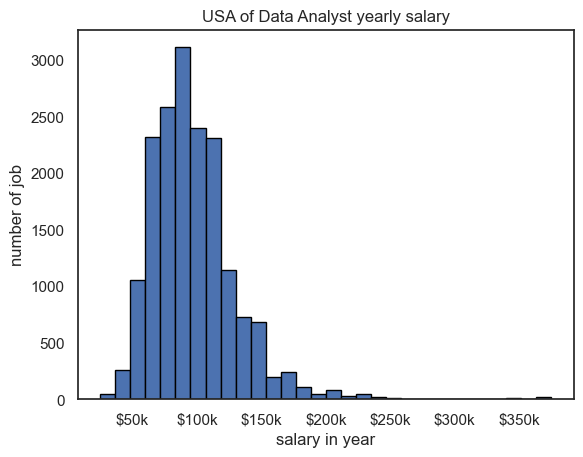

In [54]:
df_DA_US['salary_year_avg'].plot(kind='hist',bins=30,edgecolor='black')
plt.title('USA of Data Analyst yearly salary')
plt.ylabel('number of job')
plt.xlabel('salary in year')
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f'${int(x/1000)}k'))
plt.show()

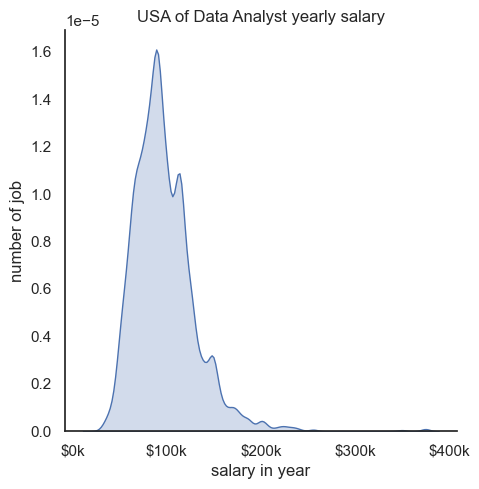

In [13]:
sns.displot(df_DA_US['salary_year_avg'],kind='kde',fill=True)
plt.title('USA of Data Analyst yearly salary')
plt.ylabel('number of job')
plt.xlabel('salary in year')
ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()

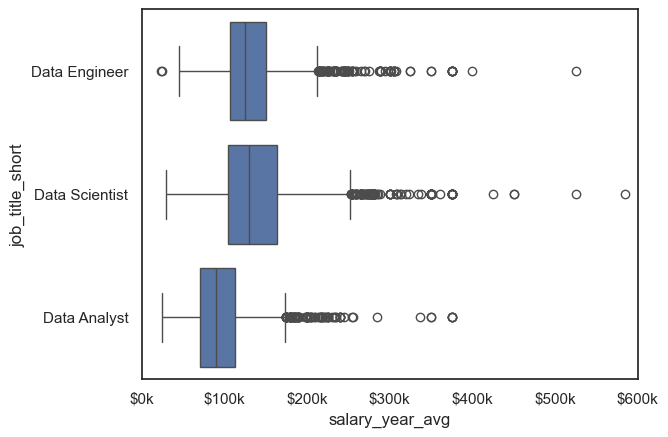

In [15]:
job_title = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US = df[(df['job_title_short'].isin(job_title)) & (
    df['job_country'] == 'United States')].dropna(subset='salary_year_avg')
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
xtick = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(xtick)
plt.xlim(0, 600000)
plt.show()

### 2

In [16]:
df_DS_US =df[(df['job_title_short']=='Data Scientist')&(df['job_country']=='United States')].copy()
df_DS_US = df_DS_US.dropna(subset='salary_year_avg')

In [17]:
df_DS_US = df_DS_US.explode('job_skills')
DS_top_pay = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median',ascending=False).head(10)

In [ ]:
DS_top_skills = df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count',ascending=False).head(10)
DS_top_skills = DS_top_skills.sort_values(by='median',ascending=False)

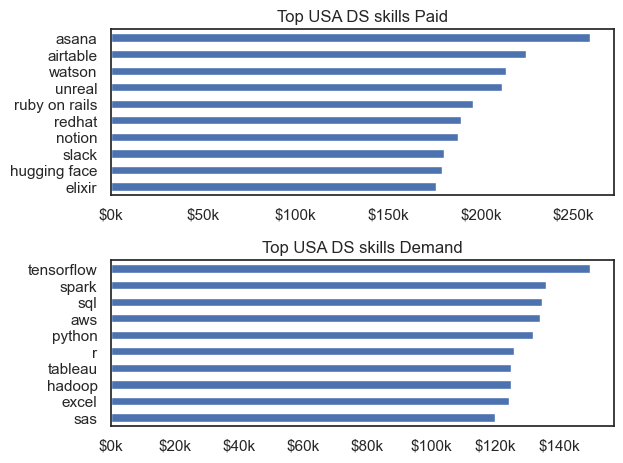

In [25]:
fig,ax=plt.subplots(2,1)

DS_top_pay[::-1].plot(kind='barh',ax=ax[0],y='median',legend=False)
ax[0].set_title('Top USA DS skills Paid')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}k"))


DS_top_skills[::-1].plot(kind='barh',ax=ax[1],y='median',legend=False)
ax[1].set_title('Top USA DS skills Demand')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}k"))

plt.tight_layout()
plt.show()

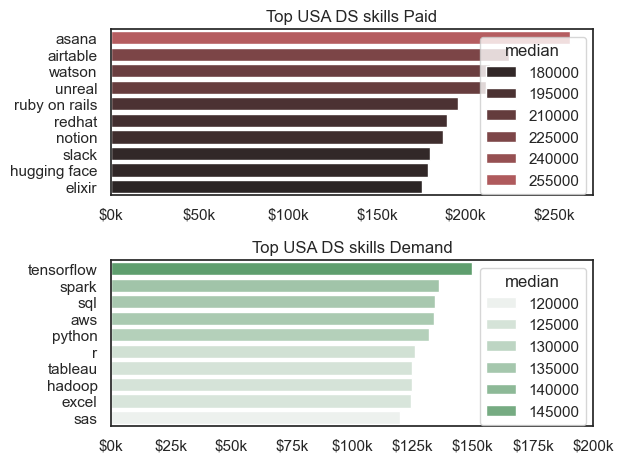

In [33]:
fig, ax = plt.subplots(2, 1)

sns.barplot(data=DS_top_pay,x='median',y=DS_top_pay.index,ax=ax[0],hue='median',palette='dark:r')
ax[0].set_title('Top USA DS skills Paid')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${int(x/1000)}k"))


sns.barplot(data=DS_top_skills, x='median',
            y=DS_top_skills.index, ax=ax[1], hue='median',palette='light:g')
ax[1].set_title('Top USA DS skills Demand')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].set_xlim(0,200000)
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${int(x/1000)}k"))


plt.tight_layout()
plt.show()

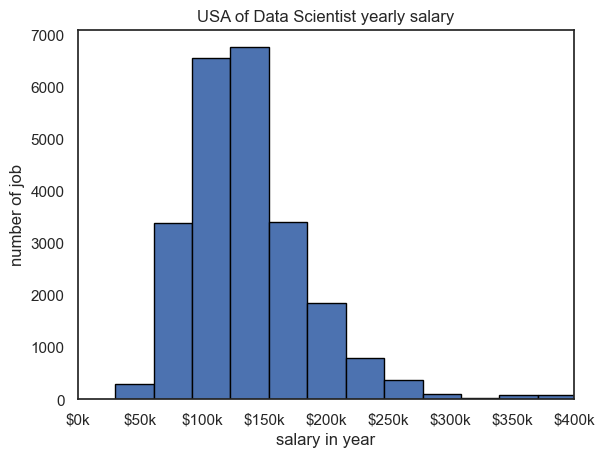

In [36]:
df_DS_US['salary_year_avg'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('USA of Data Scientist yearly salary')
plt.ylabel('number of job')
plt.xlabel('salary in year')
plt.xlim(0,400000)
ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()

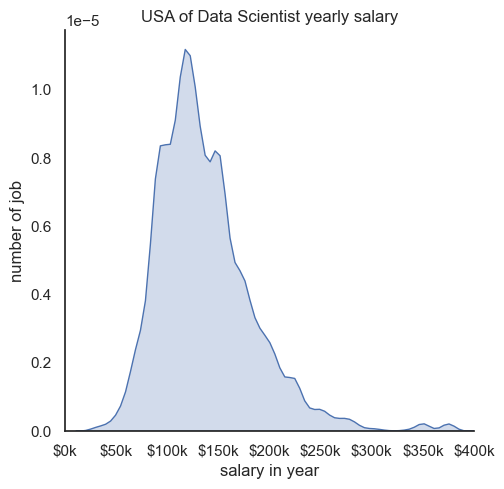

In [38]:
sns.displot(df_DS_US['salary_year_avg'], kind='kde', fill=True)
plt.title('USA of Data Scientist yearly salary')
plt.ylabel('number of job')
plt.xlabel('salary in year')
plt.xlim(0,400000)
ax = plt.gca()
ax.xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k'))
plt.show()

In [39]:
job_title = ['Data Analyst', 'Data Scientist', 'Data Engineer']
df_US1 = df[(df['job_title_short'].isin(job_title)) & (
    df['job_country'] == 'United States')].dropna(subset='salary_year_avg')
df_US1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


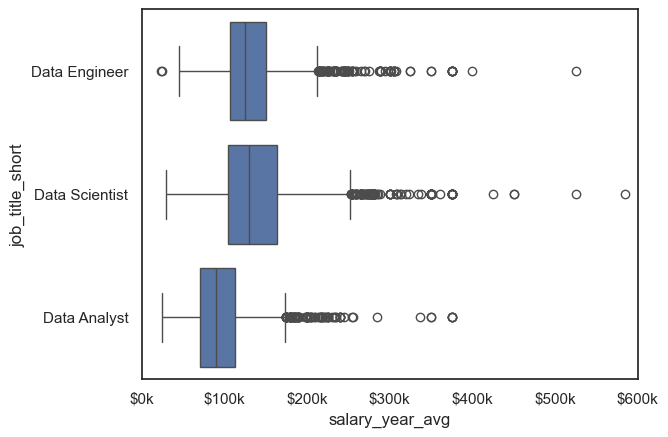

In [40]:
sns.boxplot(data=df_US, x='salary_year_avg', y='job_title_short')
xtick = plt.FuncFormatter(lambda x, _: f'${int(x/1000)}k')
plt.gca().xaxis.set_major_formatter(xtick)
plt.xlim(0, 600000)
plt.show()